In [2]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import utils as utl

# Load Raw Data

In [3]:
# load HDF file
dfs = pd.read_hdf('./data/Ballsystem_LegKinematics_DataStructures/P9_BPN/alldata_V3.h5')

In [15]:
# select some fly
n_fly = 2 # 0: BPN, 1: P9 right, 2: P9 left
df = dfs.loc[n_fly, 'flydata']

# some sets of columns
c_xyz = [c for c in df.columns if c[-2:] in ['_x', '_y', '_z']]
c_tag = [ c for c in c_xyz if 'TaG_' in c ]
c_ball = [ 'x_vel', 'y_vel', 'z_vel' ]

leg2step = {
    'R-F': 'R1',
    'R-M': 'R2', 
    'R-H': 'R3',
    'L-F': 'L1',
    'L-M': 'L2', 
    'L-H': 'L3',}

leg2step = {
    'R-F': 'L1',
    'R-M': 'L2', 
    'R-H': 'L3',
    'L-F': 'R1',
    'L-M': 'R2', 
    'L-H': 'R3',}

df_raw = df
df_raw

,flynum,tnum,fnum,SF,R-F-ThC_x,R-F-ThC_y,R-F-ThC_z,R-F-CTr_x,R-F-CTr_y,R-F-CTr_z,...,R3D_flex,x_vel,y_vel,z_vel,L1_stepcycle,L2_stepcycle,L3_stepcycle,R1_stepcycle,R2_stepcycle,R3_stepcycle
0,1,1,0,25,0.512781,-0.059520,90.129425,0.360708,0.300253,90.263167,...,152.890039,-0.484678,4.796274e-28,5.826226,True,True,True,True,True,True
1,1,1,1,25,0.512328,-0.058908,90.128075,0.365145,0.298875,90.273223,...,152.549858,0.482418,1.678248e+00,5.630400,True,True,True,True,True,True
2,1,1,2,25,0.510884,-0.058121,90.127967,0.368342,0.298071,90.282739,...,150.999794,1.118539,2.778597e+00,5.430381,True,True,True,True,True,True
3,1,1,3,25,0.508436,-0.057045,90.128902,0.371228,0.298778,90.290147,...,149.650744,1.298492,3.056724e+00,5.219781,True,True,True,True,True,True
4,1,1,4,25,0.505209,-0.055487,90.130446,0.372456,0.301202,90.296125,...,149.566883,1.246395,2.722456e+00,4.982370,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181995,13,10,13995,100,0.830110,-0.081763,90.068229,0.759043,0.324531,90.117033,...,171.880922,-0.800989,1.170721e+00,0.761779,True,True,True,True,True,True
181996,13,10,13996,100,0.830633,-0.082386,90.068170,0.756384,0.322681,90.117266,...,171.945424,-1.211456,1.696038e+00,0.513978,True,True,True,True,True,True
181997,13,10,13997,100,0.831315,-0.083065,90.068013,0.754366,0.320797,90.117446,...,171.890850,-1.482893,2.466001e+00,0.108765,True,True,True,True,True,True
181998,13,10,13998,100,0.832071,-0.083755,90.067785,0.752900,0.318976,90.117516,...,171.828323,-1.728447,3.277642e+00,-0.323407,True,True,True,True,True,True


# Plot stepcycles

In [18]:
# ball_c = np.array([-3.60054343e-02, 3.83575489e+00, 9.06335406e+01]) # P9LT
ball_c = np.array([-5.75194107e-02, 4.08134419e+00, 9.06406343e+01]) # P9RT
# ball_c = np.array([-5.17700341e-02 , 3.86083343e+00,  9.06099816e+01])
df_d = utl.dist_from_center(df_raw, ball_c)
df_d

,R-F-ThC,R-F-CTr,R-F-FeTi,R-F-TiTa,R-F-TaG,R-M-ThC,R-M-CTr,R-M-FeTi,R-M-TiTa,R-M-TaG,...,L-M-TiTa,L-M-TaG,L-H-ThC,L-H-CTr,L-H-FeTi,L-H-TiTa,L-H-TaG,R-WH,L-WH,Notum
0,4.211097,3.822833,3.912026,3.547804,3.397502,4.207156,3.924823,4.441395,3.846948,3.430354,...,3.772916,3.423905,4.182848,3.930686,4.191301,3.639482,3.277854,4.634854,4.554090,4.806632
1,4.210597,3.823704,3.910591,3.548933,3.397541,4.206946,3.923799,4.436358,3.843370,3.427259,...,3.767145,3.421379,4.183914,3.930296,4.183853,3.641820,3.302673,4.634792,4.553259,4.806669
2,4.209642,3.823952,3.914156,3.553089,3.399799,4.206823,3.921622,4.428626,3.837663,3.419520,...,3.763188,3.417885,4.183317,3.930149,4.175987,3.641376,3.332117,4.634555,4.552572,4.806733
3,4.208140,3.822888,3.921566,3.559377,3.402443,4.206827,3.918217,4.419507,3.830908,3.409202,...,3.760615,3.413762,4.182274,3.929781,4.168748,3.640326,3.351699,4.634463,4.552057,4.806792
4,4.205987,3.820084,3.926751,3.562767,3.400026,4.207070,3.914107,4.410999,3.824380,3.401853,...,3.757531,3.406362,4.181387,3.929165,4.164224,3.639158,3.359728,4.634685,4.551692,4.806815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181995,4.294996,3.880023,3.931756,3.537614,3.341448,4.308800,4.095148,4.251780,3.680294,3.383407,...,3.696732,3.338690,4.292130,3.995362,4.341442,3.719309,3.332704,4.696654,4.689503,4.932908
181996,4.295716,3.881225,3.940426,3.542349,3.342023,4.308737,4.088846,4.248186,3.677669,3.380264,...,3.699562,3.341390,4.292150,3.996178,4.351605,3.727682,3.336862,4.696634,4.689575,4.932916
181997,4.296537,3.882602,3.947535,3.547859,3.342840,4.308639,4.081350,4.244934,3.675668,3.377925,...,3.702477,3.344293,4.292201,3.997013,4.363433,3.737812,3.338049,4.696627,4.689617,4.932923
181998,4.297392,3.884051,3.953882,3.555122,3.343671,4.308723,4.081348,4.243138,3.674882,3.377121,...,3.704754,3.346486,4.292274,3.997662,4.373366,3.745938,3.335843,4.696731,4.689656,4.932928


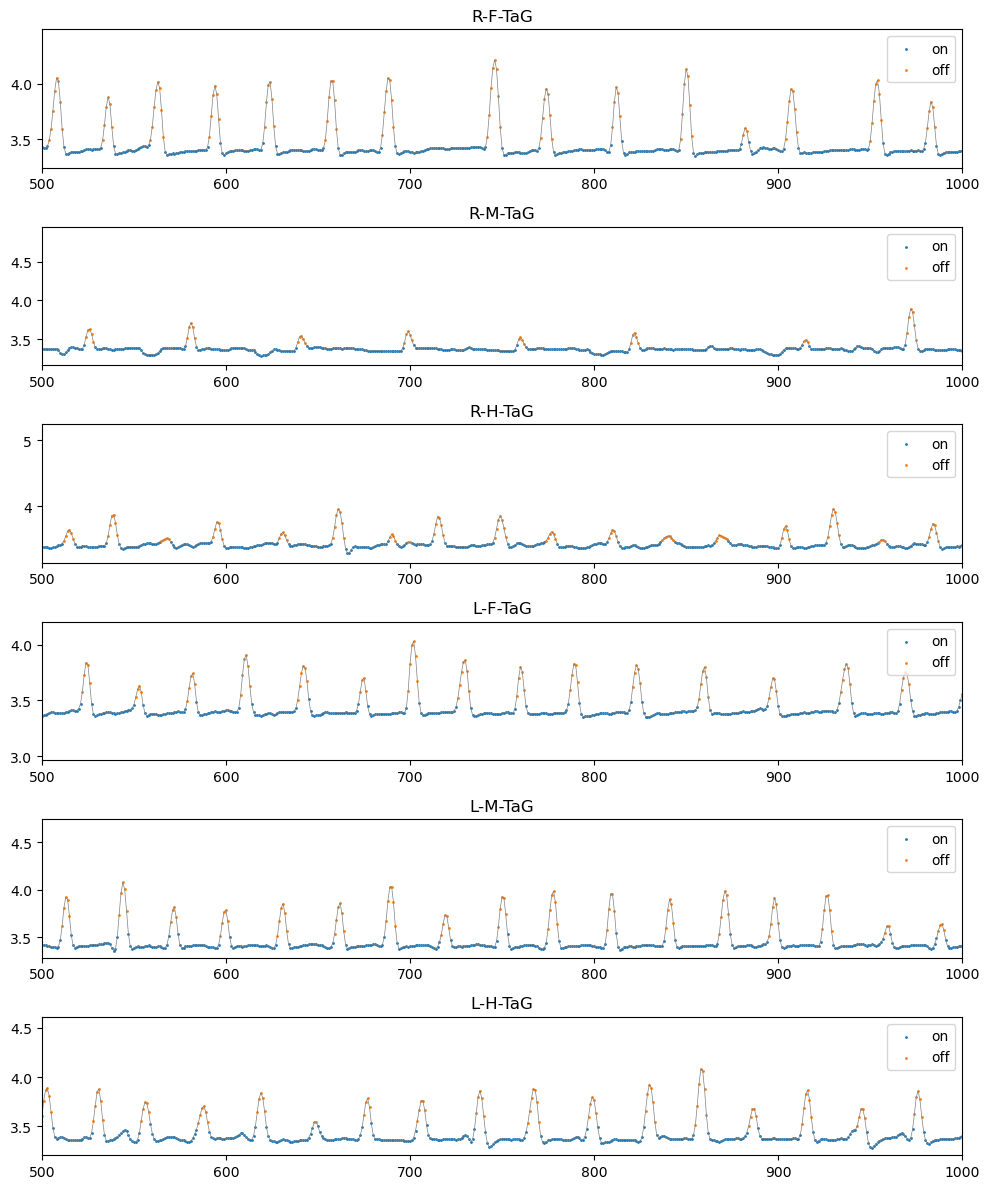

In [19]:
flynum, tnum = 1, 1

df1 = df_raw.groupby('flynum').get_group(flynum)
df1 = df1.groupby('tnum').get_group(tnum) # comment this line to look at all trials
df2 = df_d.loc[df1.index, :]

cols = [ c for c in df2.columns if 'TaG' in c ]

n = len(cols)
fig, axarr = plt.subplots(nrows=n, figsize=(10, 2*n))

for c, ax in zip(cols, axarr):

    r = df2.loc[:, c]
    ax.plot(r, lw=0.5, c='gray')

    c_on = '{}_stepcycle'.format(leg2step[c[:3]])
    f_on = df1.loc[:, c_on]

    x = r.loc[f_on]
    ax.scatter(x.index, x.values, s=1, label='on')

    x = r.loc[~f_on]
    ax.scatter(x.index, x.values, s=1, label='off')
    ax.legend()
    ax.set_title(c)

    ax.set_xlim((500, 1000))

fig.tight_layout()